In [7]:
from textblob import TextBlob
import numpy as np
import pandas as pd
import nltk
pd.options.display.max_columns = None
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import set_config
from sklearn.base import clone
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from feature_engine.preprocessing import MatchVariables
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder, OneHotEncoder
from feature_engine.imputation import (
    AddMissingIndicator, MeanMedianImputer, CategoricalImputer, EndTailImputer
)
from feature_engine.transformation import PowerTransformer
from feature_engine.creation import RelativeFeatures
from feature_engine.selection import DropFeatures
plt.style.use('ggplot')
train = pd.read_csv('/Users/manu/Analisis Predictivo/Final/train.csv')
val = pd.read_csv('/Users/manu/Analisis Predictivo/Final/val.csv')
valpred = pd.read_csv('/Users/manu/Analisis Predictivo/Final/valpred.csv')

Puntajes de la validación cruzada: [0.91889063 0.91889063 0.91884703 0.91884703 0.91884703]
Puntaje promedio: 0.9188644688644688
Accuracy: 0.9176260247688819
F1-Score: 0.9570437748720864
Precision: 0.9176260247688819
Recall: 1.0
AUC-ROC: 0.606857440084556


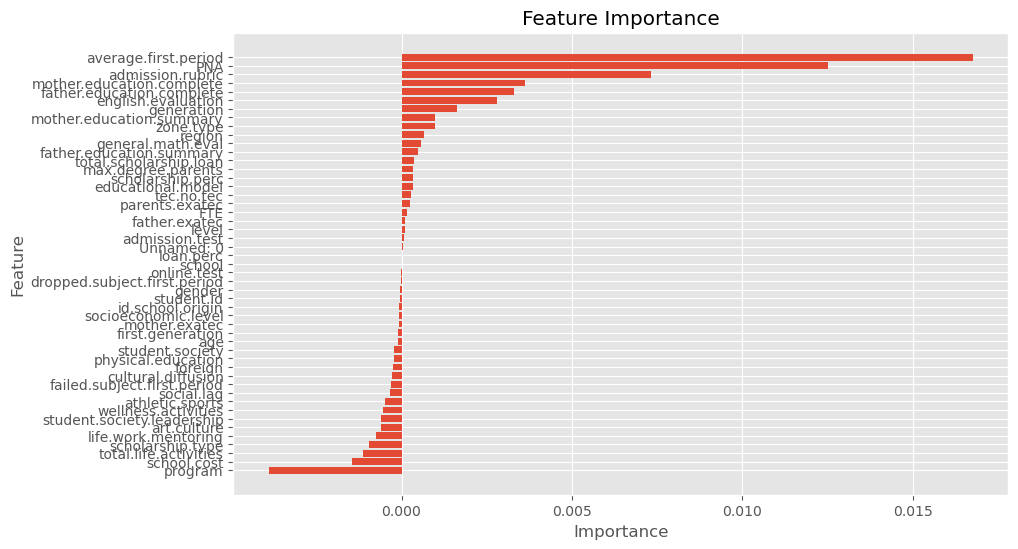

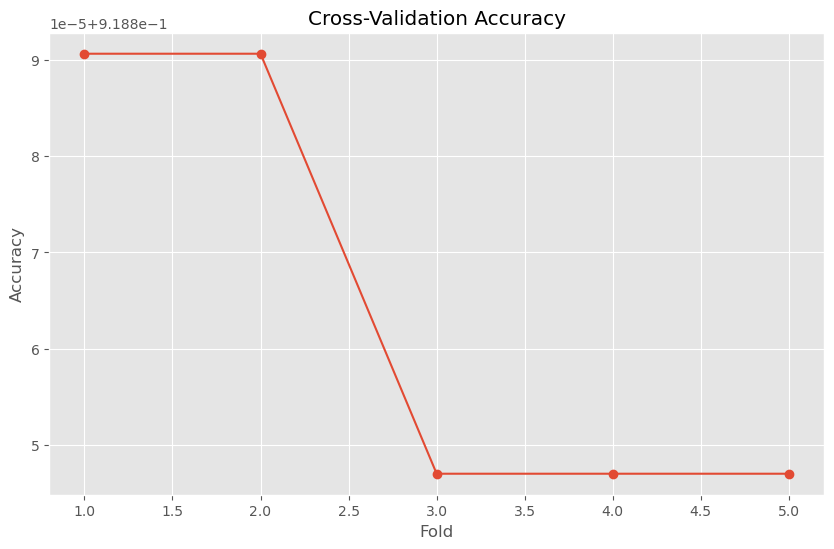

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = train.drop('retention', axis=1)
y = train['retention']

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Realizar la validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

# Imprimir los puntajes de la validación cruzada
print("Puntajes de la validación cruzada:", cv_scores)
print("Puntaje promedio:", cv_scores.mean())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141102)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC (AUC-ROC)
probabilities = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)
print("AUC-ROC:", auc_roc)

# Obtener la importancia de las características (feature importance)
importance = model.coef_[0]
feature_names = X.columns
sorted_indices = np.argsort(importance)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# Graficar la efectividad de los hiperparámetros en la validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy")
plt.show()


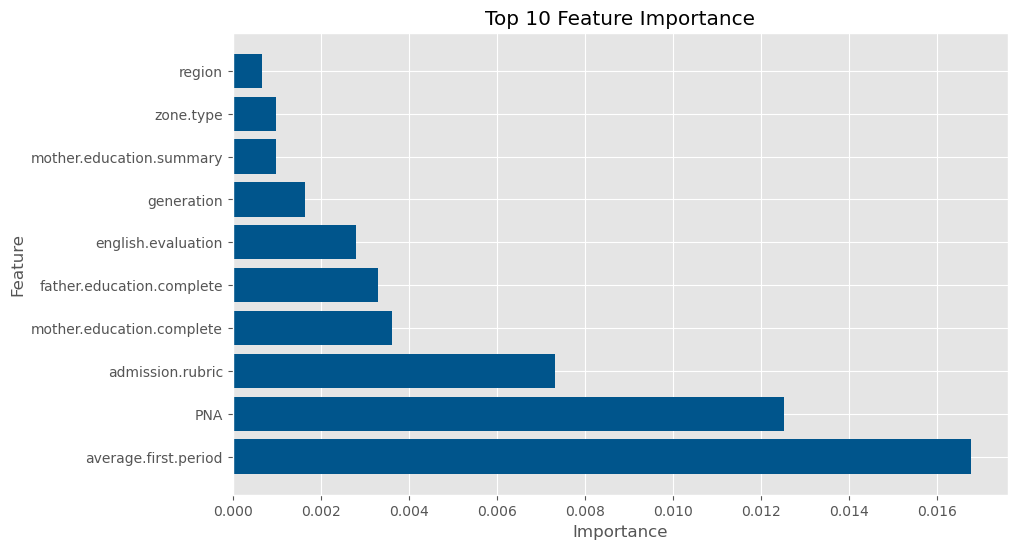

In [14]:
# Obtener los índices de las características ordenadas por importancia
sorted_indices = np.argsort(importance)[::-1][:10]

# Obtener los nombres de las características correspondientes a los índices
top_feature_names = feature_names[sorted_indices]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), importance[sorted_indices], align='center', color='#00558c')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance")
plt.show()



In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir la base de datos val en variables predictoras (X_val) y variable objetivo (y_val)
X_val = val

# Utilizar el modelo entrenado para predecir los valores de 'retention' en la base de datos val
y_pred = model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['retention'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['Unnamed: 0'], y_pred_df], axis=1)

# Imprimir el resultado
submission['retention'].value_counts()

1.0    28666
Name: retention, dtype: int64

In [17]:
# Calcular las métricas de desempeño utilizando las predicciones y los valores reales
accuracy = accuracy_score(submission['retention'], valpred['retention'])
precision = precision_score(submission['retention'], valpred['retention'])
recall = recall_score(submission['retention'], valpred['retention'])
f1 = f1_score(submission['retention'], valpred['retention'])
#auc_roc = roc_auc_score(submission['retention'], valpred['retention'])

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
#print("AUC-ROC:", auc_roc)

Accuracy: 0.9185097327844833
Precision: 1.0
Recall: 0.9185097327844833
F1-Score: 0.9575241835769874


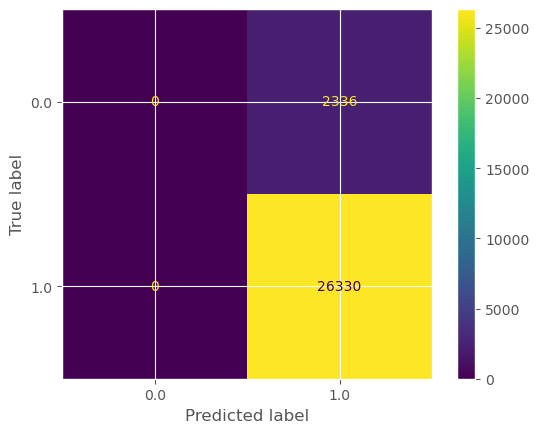

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score

ConfusionMatrixDisplay.from_predictions(valpred['retention'], submission['retention'])

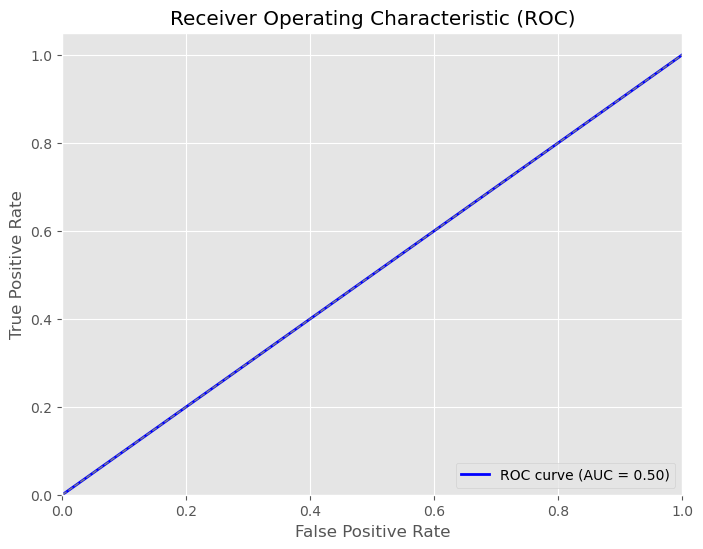

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC-ROC
fpr, tpr, thresholds = roc_curve(valpred['retention'], submission['retention'])
auc_roc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## Prueba muestreo estratificado

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample

# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = train.drop('retention', axis=1)
y = train['retention']

# Separar los datos de la clase mayoritaria (no dropout) y la clase minoritaria (dropout)
no_dropout = train[train['retention'] == 1]
dropout = train[train['retention'] == 0]

# Realizar el muestreo estratificado sobre la clase mayoritaria
no_dropout_sampled = resample(no_dropout, n_samples=len(dropout), random_state=42)

# Combinar los datos muestreados de la clase mayoritaria con la clase minoritaria
sampled_data = pd.concat([no_dropout_sampled, dropout])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(sampled_data.drop('retention', axis=1), sampled_data['retention'], test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC (AUC-ROC)
probabilities = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)
print("AUC-ROC:", auc_roc)

# Obtener la importancia de las características (feature importance)
importance = model.coef_[0]
feature_names = X.columns
sorted_indices = np.argsort(importance)



Accuracy: 0.5325094035464804
F1-Score: 0.565651522715926
Precision: 0.523325635103926
Recall: 0.6154263986963606
AUC-ROC: 0.5437164174406519


## XGBoost

In [27]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = train.drop('retention', axis=1)
y = train['retention']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141102)

# Definir los hiperparámetros
params = {
    'colsample_bytree': 0.5,
    'learning_rate': 0.01,
    'max_depth': 7,
    'n_estimators': 1000,
    'subsample': 1.0
}

# Crear el modelo XGBoost
model = xgb.XGBClassifier(**params)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC (AUC-ROC)
probabilities = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)
print("AUC-ROC:", auc_roc)


Accuracy: 0.9236438165009594
F1-Score: 0.9599212616448076
Precision: 0.925947187141217
Recall: 0.9964833911514518
AUC-ROC: 0.7660735622968895


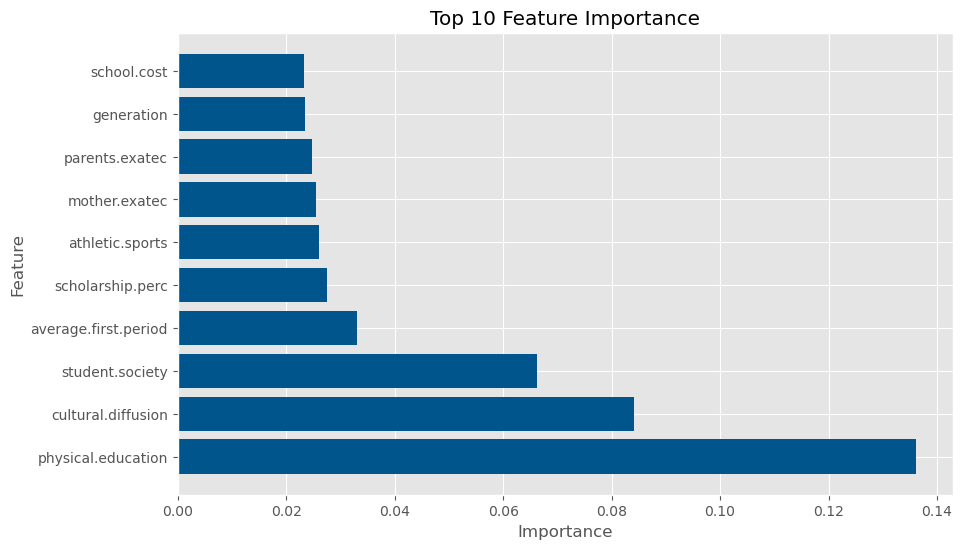

In [29]:
# Obtener la importancia de las características
importance = model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con la importancia y los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Ordenar las características por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='#00558c')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir la base de datos val en variables predictoras (X_val) y variable objetivo (y_val)
X_val = val

# Utilizar el modelo entrenado para predecir los valores de 'retention' en la base de datos val
y_pred = model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['retention'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['Unnamed: 0'], y_pred_df], axis=1)

# Imprimir el resultado
submission['retention'].value_counts()

1    28302
0      364
Name: retention, dtype: int64

In [31]:
# Calcular las métricas de desempeño utilizando las predicciones y los valores reales
accuracy = accuracy_score(submission['retention'], valpred['retention'])
precision = precision_score(submission['retention'], valpred['retention'])
recall = recall_score(submission['retention'], valpred['retention'])
f1 = f1_score(submission['retention'], valpred['retention'])
auc_roc = roc_auc_score(submission['retention'], valpred['retention'])

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9252075629665806
Precision: 0.9967337637675655
Recall: 0.9272842908628366
F1-Score: 0.9607556011129008
AUC-ROC: 0.8455102772995501


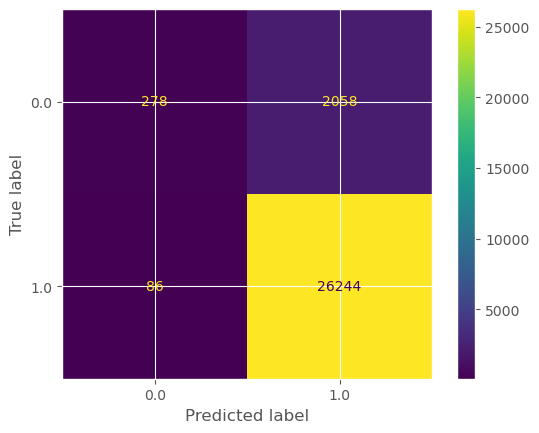

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score

ConfusionMatrixDisplay.from_predictions(valpred['retention'], submission['retention'])

## Extra Trees

In [37]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from skopt import BayesSearchCV

# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = train.drop('retention', axis=1)
y = train['retention']

# Definir los rangos de los hiperparámetros a ajustar
param_space = {
    'n_estimators': (100, 1000),
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
}

# Crear el modelo Extra Trees
model = ExtraTreesClassifier()

# Realizar la búsqueda bayesiana de hiperparámetros con validación cruzada
bayes_search = BayesSearchCV(
    model,
    param_space,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=141102)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda
results = pd.DataFrame(bayes_search.cv_results_)

# Extraer los hiperparámetros y puntajes de la búsqueda
hyperparameters = results['params']
scores = results['mean_test_score']

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(bayes_search.best_params_)

# Obtener el mejor modelo con los hiperparámetros ajustados
best_model = bayes_search.best_estimator_

# Predecir la variable objetivo para los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC (AUC-ROC)
probabilities = best_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, probabilities)
print("AUC-ROC:", auc_roc)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=502; total time=  27.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds

In [38]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir la base de datos val en variables predictoras (X_val) y variable objetivo (y_val)
X_val = val

# Utilizar el modelo entrenado para predecir los valores de 'retention' en la base de datos val
y_pred = best_model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['retention'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['Unnamed: 0'], y_pred_df], axis=1)

# Imprimir el resultado
submission['retention'].value_counts()

1.0    28436
0.0      230
Name: retention, dtype: int64

In [39]:
# Calcular las métricas de desempeño utilizando las predicciones y los valores reales
accuracy = accuracy_score(submission['retention'], valpred['retention'])
precision = precision_score(submission['retention'], valpred['retention'])
recall = recall_score(submission['retention'], valpred['retention'])
f1 = f1_score(submission['retention'], valpred['retention'])
auc_roc = roc_auc_score(submission['retention'], valpred['retention'])

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.924161027000628
Precision: 0.9987086973034561
Recall: 0.9247432831621888
F1-Score: 0.960303838147756
AUC-ROC: 0.8884585981028335


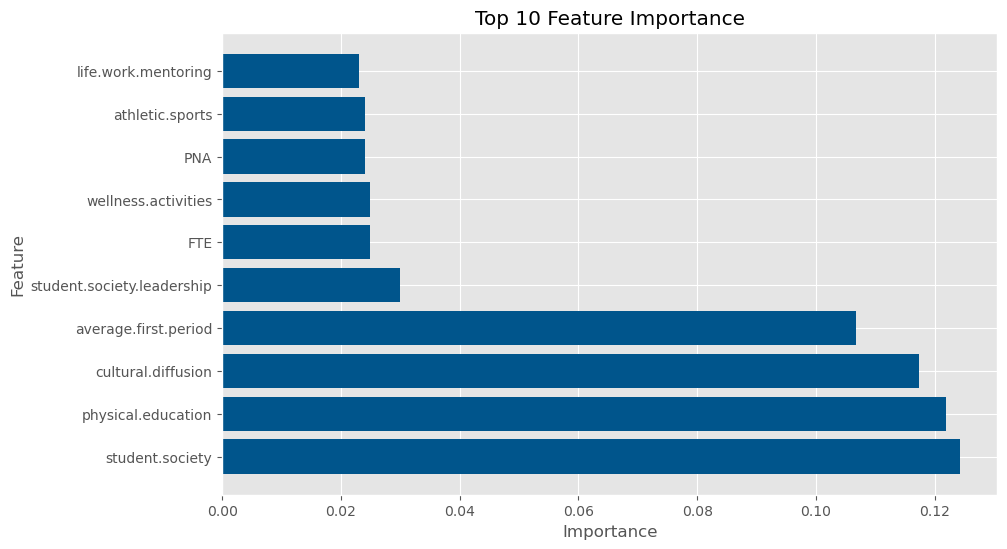

In [40]:
importance = best_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con la importancia y los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Ordenar las características por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='#00558c')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

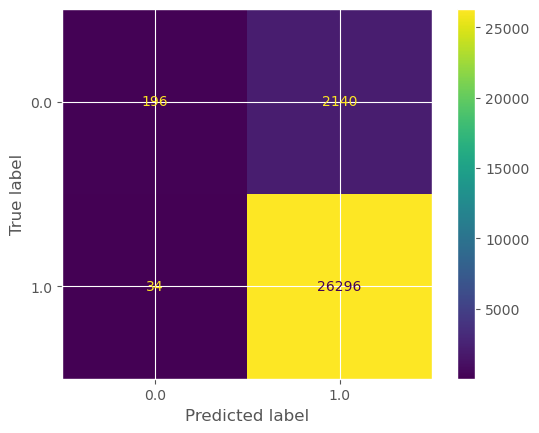

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score

ConfusionMatrixDisplay.from_predictions(valpred['retention'], submission['retention'])

## Easy ensemble

In [56]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = train.drop('retention', axis=1)
y = train['retention']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1411)

# Crear el clasificador EasyEnsemble
ensemble = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# Entrenar el clasificador
ensemble.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = ensemble.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.7104482818768533
Precision: 0.9568217790440012
Recall: 0.717241706610982
F1-Score: 0.8198882439103782


In [60]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1114)

# Crear el clasificador RUSBoost
rusboost = RUSBoostClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'sampling_strategy': ['auto', 'not minority'],
    'replacement': [True, False]
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(rusboost, param_grid, scoring='accuracy', cv=5)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predecir la variable objetivo para los datos de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)


Accuracy: 0.7091400662829235
Precision: 0.9547205557309757
Recall: 0.7174789995728726
F1-Score: 0.8192705793095975
AUC-ROC: 0.6661011333167963


In [61]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir la base de datos val en variables predictoras (X_val) y variable objetivo (y_val)
X_val = val

# Utilizar el modelo entrenado para predecir los valores de 'retention' en la base de datos val
y_pred = best_model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['retention'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['Unnamed: 0'], y_pred_df], axis=1)

# Imprimir el resultado
submission['retention'].value_counts()

1.0    19677
0.0     8989
Name: retention, dtype: int64

In [62]:
# Calcular las métricas de desempeño utilizando las predicciones y los valores reales
accuracy = accuracy_score(submission['retention'], valpred['retention'])
precision = precision_score(submission['retention'], valpred['retention'])
recall = recall_score(submission['retention'], valpred['retention'])
f1 = f1_score(submission['retention'], valpred['retention'])
auc_roc = roc_auc_score(submission['retention'], valpred['retention'])

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7070048140654434
Precision: 0.7141663501709077
Recall: 0.9556334807135234
F1-Score: 0.8174408242224009
AUC-ROC: 0.559193979204242


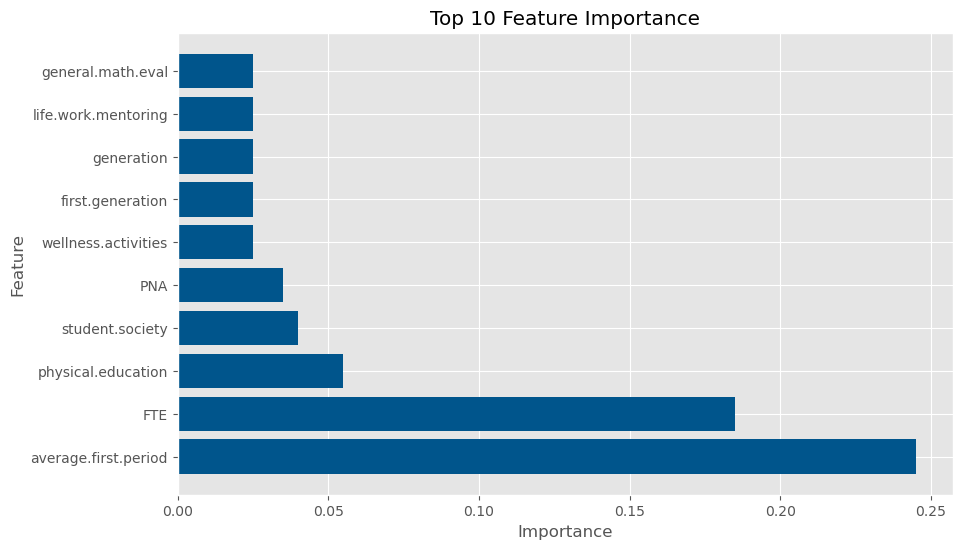

In [63]:
importance = best_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con la importancia y los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Ordenar las características por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='#00558c')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

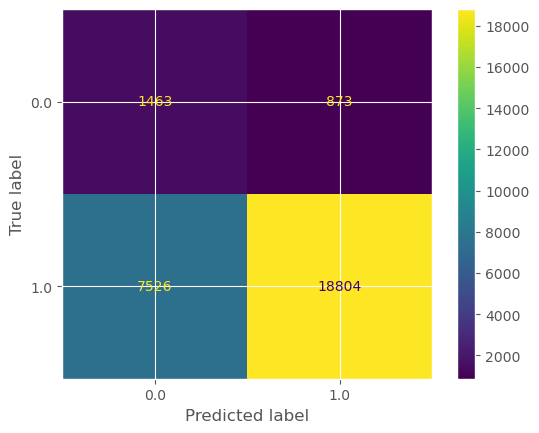

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score

ConfusionMatrixDisplay.from_predictions(valpred['retention'], submission['retention'])